<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-из-файлов-с-данными" data-toc-modified-id="Изучение-общей-информации-из-файлов-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации из файлов с данными</a></span></li><li><span><a href="#Предобработка-и-подготовка-данных-к-анализу" data-toc-modified-id="Предобработка-и-подготовка-данных-к-анализу-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка и подготовка данных к анализу</a></span></li><li><span><a href="#Анализ-данных-и-подсчёт-выручки" data-toc-modified-id="Анализ-данных-и-подсчёт-выручки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных и подсчёт выручки</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для сотового оператора

Компания «Мегалайн» является федеральным оператором сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Ознакомимся с подробным описанием тарифов. 

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 - Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
 - Сообщение — 3 рубля.
 - 1 Гб интернет-трафика — 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  - Минута разговора — 1 рубль;
  - Сообщение — 1 рубль;
  - 1 Гб интернет-трафика: 150 рублей.

**Цель исследования:**
- сделать предварительный анализ тарифов на небольшой выборке клиентов
- проанализировать поведение клиентов
- определить наиболее прибыльный тариф

**Ход исследования:**

Исходные данные прочитаем из файлов `/datasets/calls.csv`, `/datasets/internet.csv`, `/datasets/messages.csv`, `/datasets/tariffs.csv`, `/datasets/tariffs.csv` и `/datasets/users.csv`. Для проведения исследования необходимо изучить и подготовить данные. Перед началом исследования проведем предобработку данных и устраним все выявленные проблемы. Далее произведем необходимы расчеты, полученные показатели помогут провести полноценный исследовательский и статистический анализ данных. На заключительном этапе проверим гипотезы и зафиксируем полученные результаты.

**Основные этапы исследования:**

1. Знакомство с данными и изучение общей информации.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу, исследовательский анализ данных.
4. Статистический анализ, проверка гипотез.
5. Составление общего вывода.

## Изучение общей информации из файлов с данными

Ознакомимся с информацией о звонках, для этого откроем файл `/datasets/calls.csv` и сохраним датафрейм в переменную `calls`.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
# Прочитаем исходные данные о звонках
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')

Выведем первые строки датафрейма `calls`.

In [2]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**Описание данных:**

- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

Выведем основную информацию для датафрейма `calls` с помощью метода `info()`.

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В датафрейме всего 4 столбца и 202 607 строк, пропущенных значений нет. Данные в столбце `call_date` необходимо привести к типу даты и времени.

Построим гистограмму для столбца с продолжительностью звонков, чтобы рассмотреть, как распределены данные.

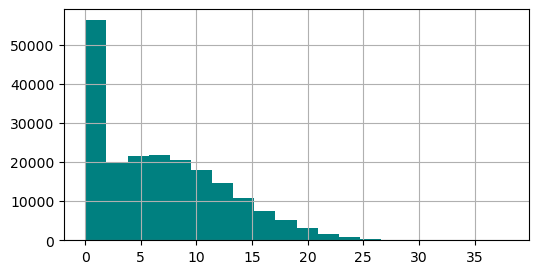

In [4]:
# Гистограмма по значениям в duration
calls['duration'].hist(figsize=(6, 3), bins=20, color='teal')
plt.show()

Наблюдаем распределение Пуассона, в основном звонкои имееют продолжительность до 10 минут, пиковые значения приходятся на самые короткие разговоры - от 0 до 2 минут. Звонки с продолжительностью более 15 минут совершаются редко.

Далее ознакомимся с информацией об интернет-сессиях. Откроем файл `/datasets/internet.csv`, сохраним датафрейм в переменную `sessions` и выведем первые строки.

In [5]:
# Прочитаем данные об интернет-сессиях
sessions = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
# Выведем первые 5 строк
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


**Описание таблицы `internet`:**
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

Выведем основную информацию для датафрейма `sessions` с помощью метода `info()`. 

In [6]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В датафрейме 5 столбцов и 149 396 строк, пропущенных значений также не наблюдаем. Необходимо изменить тип данных в `session_date` на `datetime`.

Ознакомимся с распределением значений в столбце с количеством потраченных мегабайт, для этого построим гистограмму для столбца `mb_used`.

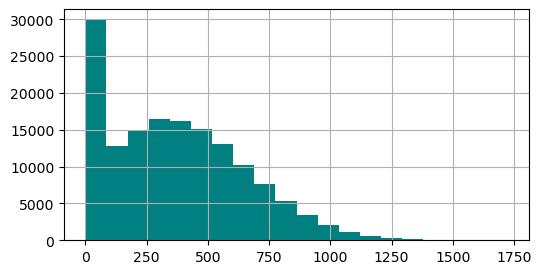

In [7]:
# Гистограмма по значениям в mb_used
sessions['mb_used'].hist(figsize=(6, 3), bins=20, color='teal')
plt.show()

Общий тренд имеет распределение Пуассона, в основном тратят до 500 мегабайт, пиковые значения приходятся в диапозоне от 0 до 80 мегабайт.

Рассмотрим данные, содержащие информацию о сообщениях. Откроем файл `/datasets/messages.csv`, сохраним датафрейм в переменную `messages` и выведем первые строки.

In [8]:
# Прочитаем данные о сообщениях
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
# Выведем первые строки
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Описание таблицы `messages`:**
- `id` — уникальный номер звонка
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

Выведем основную информацию для датафрейма `messages`. 

In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В данных с информацией о сообщениях всего 3 столбца и 123 036 строк. Пропущенных значений не обнаружили, но нужно будет привести тип данных в `message_date` к типу даты и времени.

Далее рассмотрим данные с информацией о тарифах. Для этого откроем файл `/datasets/tariffs.csv`, сохраним датафрейм в переменную `tariffs`и выведем его на экран.

In [10]:
# Прочитаем данные о тарифах
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
# Выведем таблицу 
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание данных таблицы `tariffs`:
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Ознакомимся с основной информацией для датафрейма `tariffs` с помощью метода `info()`.

In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В датафрейме `tariffs` всего 8 столбцов и 2 строки, пропущенных значений не наблюдаем.

Осталось рассмотреть данные с информацией о пользователях. Откроем файл `/datasets/users.csv`, сохраним датафрейм в переменную `users` и выведем первые строки.

In [12]:
# Прочитаем данные о пользователях
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')
# Выведем первые строки
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Описание таблицы `users`:
- `user_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tarif` — название тарифного плана

Выведем основную информацию для датафрейма `users` с помощью метода `info()`.

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В датафрейме всего 8 столбцов и 500 строк. Наблюдаем значительное количество пропусков в столбце с датой прекращения пользования тарифом, они связаны с тем, что на момент выгрузки данных тариф еще действовал. Также в двух столбцах с датой некорректный тип данных, заменим его на `datetime`.

**Вывод**

Таким образом, изучили общую информацию о пользователях, звонках, сообщениях, интернет-сессиях, тарифах и построили гисторгаммы по числовым показателям. В ходе ознакомления с данными были обнаружены пропущенные значения, а также некорректный тип данных `object` в столбцах с датами. Обработкой данных обнаруженных проблем займемся на следующем этапе предобработки данных.

## Предобработка и подготовка данных к анализу

Приведем тип данных в столбцах с датами:

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к типу даты и времени `datetime64[ns]` и проверим результат изменений.

In [14]:
# Приведем тип данных в столбцах с 'date' во всех датафреймах к типу даты и проверим изменение
col_list = ['reg_date', 'churn_date', 'call_date', 'message_date', 'session_date']
for col in col_list:
    for df in [users, calls, messages, sessions]:
        if col in df.columns:
            df[col] = df[col].astype('datetime64[ns]')
            print(f'{col}:', df[col].dtype)

reg_date: datetime64[ns]
churn_date: datetime64[ns]
call_date: datetime64[ns]
message_date: datetime64[ns]
session_date: datetime64[ns]


В данных мы обнаружили звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Однако в столбце `duration` датафрейма `calls` значения дробные. Округлим их вверх и приведем тип данных к целым числам.

In [15]:
# округление значений столбца duration с помощью np.ceil() и приведение типа к int
calls['duration'] = np.ceil(calls['duration']).astype('int')

Удалим столбец `Unnamed: 0` из датафрейма `sessions`. Столбец с таким названием появился, потому что данные сохранили с указанием индекса (`df.to_csv(..., index=column)`). Он сейчас не понадобится.

In [16]:
sessions.drop('Unnamed: 0', axis=1, inplace=True)

В таблицы с информацией о звонках, сообщениях и интернет-сессиях добавим новый столбец `month` с указанием номера месяца из столбцов `call_date`, `message_date` и `session_date`.

In [17]:
# Добавление столбца month с указанием номера месяца для заданных таблиц
for col in ['call_date', 'message_date', 'session_date']:
    for df in [calls, messages, sessions]:
        if col in df.columns:
            df['month'] = df[col].dt.month

Произведем расчет количества сделанных звонков разговора для каждого пользователя по месяцам и выведем первые строки.

In [18]:
# подсчёт количества звонков для каждого пользователя по месяцам
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))
# вывод 15 первых строк на экран
calls_per_month.head(15)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33

Рассчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраним в переменную `minutes_per_month`. Для этого сгруппируeм датафрейм с информацией о звонках по двум столбцам — с идентификаторами пользователей и номерами месяцев, далее посчитаем сумму в столбце `duration`. Выведем первые 15 строчек.

In [19]:
# подсчёт израсходованных минут для каждого пользователя по месяцам
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
# вывод первых 15 строк на экран
minutes_per_month.head(15)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраните в переменную `messages_per_month`. Нам понадобится:

- сгруппировать датафрейм с информацией о сообщениях по двум столбцам — с идентификаторами пользователей и номерами месяцев;
- затем применить метод для подсчёта количества в столбце `message_date`.

Ознакомиммся с первыми строками `messages_per_month`.

In [20]:
# подсчёт количества отправленных сообщений для каждого пользователя по месяцам
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date','count'))
# вывод первых 15 строк на экран
messages_per_month.head(15)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12

Также произведем расчет количества потраченных мегабайт по месяцам для каждого пользователя и сохраним в переменную `sessions_per_month`. Для этого сгруппируем датафрейм с информацией об интернет-сессиях по двум столбцам — с идентификаторами пользователей и номерами месяцев, а затем найдем сумму объёмов потраченного за сессию интернет-трафика (в мегабайтах).

In [21]:
# подсчёт потраченных мегабайт для каждого пользователя по месяцам
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
# вывод первых 15 строк на экран
sessions_per_month.head(15)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25

**Вывод**

Таким образом, этап предобработки и подготовки данных к анализу завершен. Пропущенные значения найдены, изучены, по возможности обработаны, указаны причины, которые могли привести к пропускам в данных. В ходе исследования рассмотрели типы данных каждого столбца и выявили такие, где потребовалась замена. Так, у столбцов с датами привели тип данных к типу даты и времни, а в других изменили тип данных для удобства расчетов и экономии памяти. 

В процессе подготовки данных к анализу были добавлены новые столбцы с указанием номера месяца. Также произвели расчеты для каждого пользователя по месяцам следующих показателей:
- количество сделанных звонков разговора 
- количество израсходованных минут разговора 
- количество отправленных сообщений 
- количество потраченных мегабайт 

## Анализ данных и подсчёт выручки

Объединяем все посчитанные выше значения в один датафрейм `user_behavior`.
Для каждой пары «пользователь — месяц» будет доступна информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [22]:
# Вывод доли расторгнутых договоров в %
print(users['churn_date'].count() / users['churn_date'].shape[0] * 100, '% клиентов расторгли договор.')

7.6 % клиентов расторгли договор.


In [23]:
# Объединение ранее рассситаных показателей в один датафрейм
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\
# Вывод первых строк
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения.

In [24]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Наблюдаем, что в некоторых столбцах есть пропущенные значения. Заполним их нулями в столбцах `calls`, `messages`, `mb_used` и `minutes`.

In [25]:
# Замена пропусков нулевыми значениями в указанных столбцах
for col in ['calls', 'minutes', 'messages', 'mb_used']:
    user_behavior[col].fillna(0, inplace=True)

Присоединим информацию о тарифах к датафрейму `user_behavior` и выведем первые строки.

In [26]:
# Переименование столбца tariff_name на более простое tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [27]:
# Добавление информации о тарифах в таблицу user_behavior
user_behavior = user_behavior.merge(tariffs, on='tariff')
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Произведем расчет количества минут разговора, сообщений и мегабайт, превышающих включённые в тариф.

In [28]:
# Найдем разность использованных минут/сообщений/мб и включенных в тарифный план
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']
# Заполним отрицательные значения 0
for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переведем превышающие тариф мегабайты в гигабайты и сохраним в столбец `paid_gb`

In [29]:
# Перевод значений из Мб в Гб
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Посчитаем выручку за дополнительные минуты разговора, сообщения и интернет и добавим результаты в новые столбцы `cost_minutes`, `cost_messages`, `cost_gb`.

In [30]:
# Расчет выручки за дополнительные минуты/сообщения/интернет-трафик и добавление новых столбцов
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Рассчитаем помесячную выручку с каждого пользователя, она будет храниться в столбце `total_cost`.

In [31]:
# Расчет выручки с каждого пользователя по месяцам (цена тарифа + доп.минуты/смс/Гб)
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Создадим новый датафрейм `stats_df` для каждой пары «месяц — тариф. В нем будут средние и медианные значения, а также стандартные отклонения для количества звонков, сообщений, минут и интерент-трафика (в Мб). Посмотрим на первые строки полученной таблицы.

In [32]:
# Сохранение статистических метрик для каждой пары месяц-тариф (среднее значение, стандартное отклонение, медиана)
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()
# Переименование столбцов
stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']
# Вывод первых строк
stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Рассмотрим распределение среднего количества звонков по видам тарифов и месяцам.

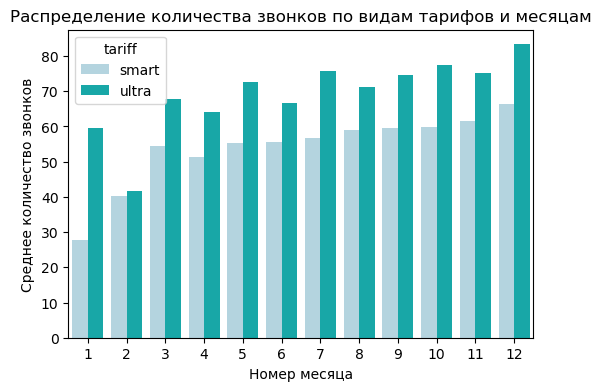

In [33]:
# Импорт библиотеки и установка размеров графика и его отображение 
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'c'])
# Задаем название графику и подписи осей
ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

Наблюдаем, что ежемесячно среднее количество звонков тарифа "Ультра" превосходит количество звонков тарифа "Смарт". Меньше всего звонков абоненты совершили в феврале, а максимально активно звонили в декабре.

Далее рассмотрим распределение количества звонков по тарифам за год.

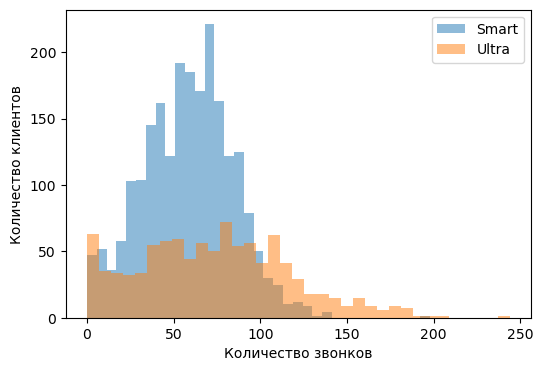

In [34]:
# Cтроим гистограммы по распределению количества звонков по тарифам за год
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5, figsize=(6, 4))
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

В среднем большее количество звонков совершают абоненты тарифа "Ультра". Основная часть абонентов данного тарифа совершает порядка 125 звонков, в то время как большая доля абонентов тарифа "Смарт" совершают от 25 до 100 звонков.

Посмотрим на распределение средней продолжительности звонков по видам тарифов и месяцам.

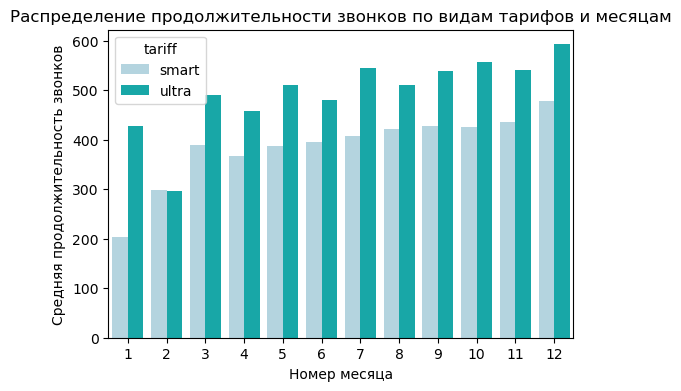

In [35]:
# Установка размеров графика и его отображение
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'c'])
# Задаем название графику и подписи осей
ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

Распределение средней продолжительности звонков по видам тарифов и месяцам похоже на распределение количества звонков. Также наблюдаем ежемесячное превосходство для тарифа "Ультра". Самые короткие разговоры в феврале, а самые продолжительные в конце года.

Рассмотрим распределение продолжительности звонков по тарифам за год.

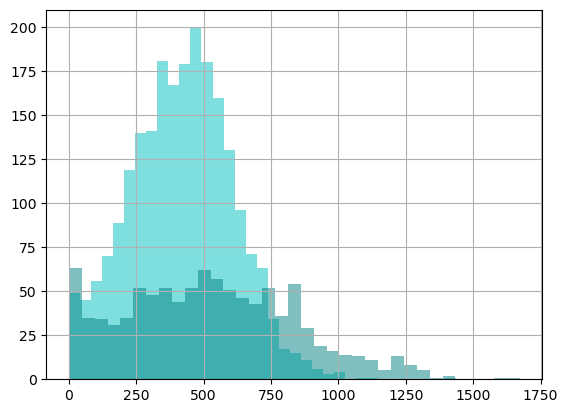

In [36]:
# Cтроим гистограммы по распределению продолжительности звонков по тарифам за год
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='c')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='teal');

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

Отобразим распределение среднего количества сообщений по видам тарифов и месяцам.

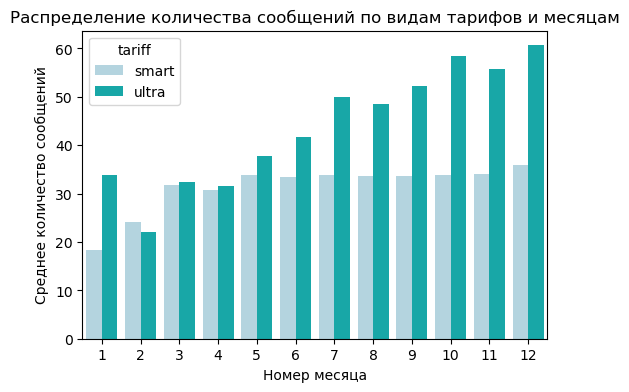

In [37]:
# Установка размеров графика и его отображение
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'c']
)
# Задаем название графику и подписи осей
ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

Можем наблюдать ежемесячное превосходство по количеству сообщений абонентов тарифа "Ультра". Количество отправленных смс у клиентов с данным тарифным планом нелинейно увеличивалось на протяжении года, в то время как на тарифе "Смарт" среднее число отправленнных сообщений росло в первые 3 месяца, а остальную часть года практически не менялось.

Также рассмотрим распределение количества сообщений по тарифам за весь год.

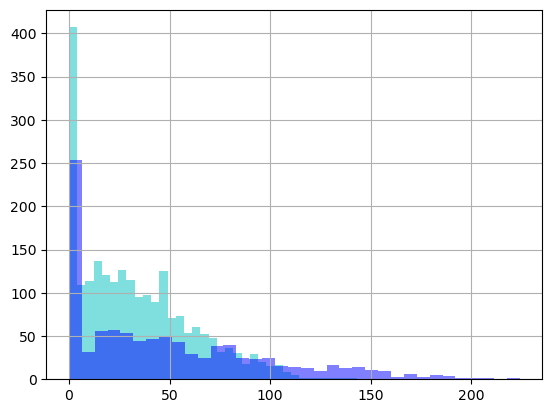

In [38]:
# Cтроим гистограммы по распределению количества сообщений по тарифам за год
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='c')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='b');

В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

Отобразим распределение количества потраченного трафика (Мб) по видам тарифов и месяцам.

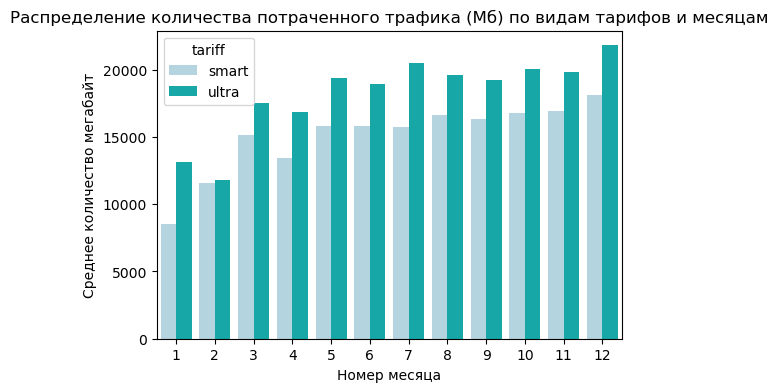

In [39]:
# Установка размеров графика и его отображение
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'c']
)
# Задаем название графику и подписи осей
ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

По количеству потраченного трафика также каждый месяц превосходит тариф "Ультра". Наибольшая активность использования интернета в декабре, наименьшая - в январе, феврале и апреле. На протяжении года расход трафика увеличивается.

Также посмотрим на сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra за год.

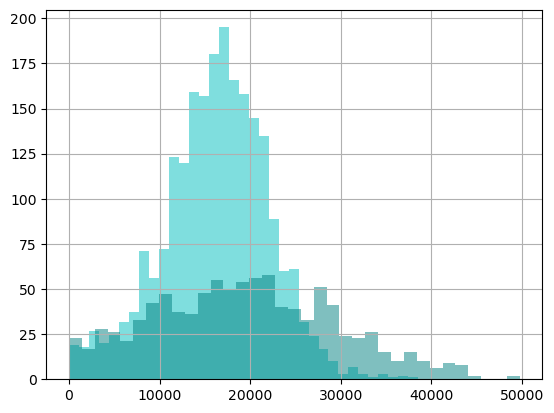

In [40]:
# Cтроим гистограммы по распределению количества Мб по тарифам за год
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='c')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='teal');

В среднем пользователи тарифа Ultra активнее используют интернет, чем пользователи тарифа Smart. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 Гб.

**Вывод**

На этапе анализа данных объединили все посчитанные ранее значения в один датафрейм `user_behavior`, в котором для каждой пары «пользователь — месяц» хранится информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах. Дополнили таблицу информацией о тарифах и произвели расчет количества минут разговора, сообщений и мегабайт, превышающих включённые в тариф. С учетом дополнительных расходов рассчитали помесячную выручку с каждого пользователя.

На основании этой таблицы построили новую, `stats_df` для каждой пары «месяц — тариф. В ней отразили средние и медианные значения, а также стандартные отклонения для количества звонков, сообщений, минут и интерент-трафика (в Мб). С ипользованием данных из двух таблиц изучили и проанализировали следующие распределения:
- распределение среднего количества и средней продолжительности звонков по видам тарифов и месяцам
- распределение среднего количества сообщений по видам тарифов и месяцам
- распределение количества потраченного трафика (Мб) по видам тарифов и месяцам

На основании полученных графиков пришли к выводу, что по всем параметрам набольшая активность у абонентов тарифа "Ультра".

## Проверка гипотез

Основной целью исследования является выявление наиболее прибыльного тарифа. Для этого нам необходимо сравнить среднюю выручку пользователей тарифов «Ультра» и «Смарт».

In [41]:
# Расчет средней выручки пользователей для каждого тарифа
smart_revenue = user_behavior[user_behavior['tariff'] =='smart']['total_cost']
print(f'Средняя выручка пользователей тарифа "Смарт" - {round(smart_revenue.mean())} рублей.')
ultra_revenue = user_behavior[user_behavior['tariff'] =='ultra']['total_cost']
print(f'Средняя выручка пользователей тарифа "Ультра" - {round(ultra_revenue.mean())} рублей.')

Средняя выручка пользователей тарифа "Смарт" - 1290 рублей.
Средняя выручка пользователей тарифа "Ультра" - 2070 рублей.


Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [42]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(ultra_revenue, smart_revenue, equal_var=False)
# критический уровень статистической значимости
alpha = .05
# вывод значения p-value на экран 
print(f'p-value = ',results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

p-value =  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Таким образом, подтверждается альтернативная гипотеза о том, что выручка тарифных планов "Смарт" и "Ультра" отличается. Только на основании проверки гипотезы не можем сказать, какая выручка больше, т.к. гипотеза двухсторонняя. Но ранее мы рассчитали среднюю выручку для обоих тарифов, поэтому резюмируем, что cредняя выручка пользователей тарифа "Ультра" выше.

Далее сравним среднюю выручку пользователей из Москвы с выручкой пользователей из других регионов.

In [43]:
# Расчет средней выручки для пользователей из Москвы и для пользователей из других регионов
msc_revenue = user_behavior[user_behavior['city'] == 'Москва']['total_cost']
print(f'Средняя выручка пользователей из Москвы - {round(msc_revenue.mean())} рублей.')
other_revenue = user_behavior[user_behavior['city'] != 'Москва']['total_cost']
print(f'Средняя выручка пользователей из других регионов - {round(other_revenue.mean())} рублей.')

Средняя выручка пользователей из Москвы - 1547 рублей.
Средняя выручка пользователей из других регионов - 1525 рублей.


Проверка гипотезы: средняя выручка с пользователей из Москвы отличается от выручки пользователей других регионов; 

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [44]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(msc_revenue, other_revenue, equal_var=False)
# критический уровень статистической значимости
alpha = .05
# вывод значения p-value на экран
print(f'p-value = ',results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value =  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Можем сделать выввод, что средняя выручка пользователей из Москвы почти не отличается от выручки пользователей из других регионов. На основании проверки гипотезы мы не можем сказать, что больше, — только что количество выручки почти одинаково и входит в диапазон статистической значимости. Так как гипотеза двухсторонняя, мы не знаем, в какую сторону оно отличается. Однако, посчитав среднее количество выручки для Москвы и других регионов, подтверждаем: выручка не отличается существенно.

**Вывод**

В процессе проверки гипотезы о равенстве выручки пользователей двух тарифных планов установили что, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. А при сравнении выручки пользователей из Москвы с выручкой пользователей из других регионов, не удалось отвергнуть гипотезу о равенстве средней выручки.

## Общий вывод

Проводя исследовательскую работу по определению перспективного тарифа для сотового оператора изучили и подготовили данные к анализу. Были выявлены и заполнены пропущенные значения, а также изменен некорректный тип данных. Произвели необходимые расчеты для проведения полноценного анализа данных. Для визуальной интерпретации распределения значений по таким показателям как: среднее количество и средняя продолжительность звонков по видам тарифов и месяцам, среднее количество сообщений по видам тарифов и месяцам, количество потраченного трафика (Мб) по видам тарифов и месяцам использовали сводные таблицы, гистограммы и графики, на основании которых проанализировали поведение клиентов.

В процессе исследования данных, полученных от 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год пришли к следующим выводам:

- **Анализ поведения клиентов**

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

В среднем пользователи тарифа Ultra отправляют больше сообщений — почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифах растёт. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15–17 Гб, а абоненты тарифного плана Ultra — 19–21 Гб.

- **Проверка гипотез**

Приняли альтернативную гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Это подтверждается и средними значениями. Средняя выручка пользователей тарифа "Смарт" - 1290 рублей, тарифа "Ультра" - 2070 рублей.

Не удалось отвергнуть нулевую гипотезу о равенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов. Что подтверждают и средние значения, средняя выручка пользователей из Москвы - 1547 рублей, а пользователей из других регионов - 1525 рублей.

Резюмируя результаты проведенного статистического анализа данных, полагаем, что предварительный анализ тарифов позволит определить дальнейшую стратегию телекоммуникационной компании.